In [1]:
#import the files required - train
from google.colab import files
import io
uploaded =files.upload()
for fn in uploaded.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving Train.csv to Train.csv
User uploaded file "Train.csv" with length 869537 bytes


In [2]:
#import the files required - test
upload =files.upload()
for fn in upload.keys():
   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(upload[fn])))

Saving Test.csv to Test.csv
User uploaded file "Test.csv" with length 527709 bytes


In [3]:
#Load the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train_data = pd.read_csv('Train.csv')
print("Shape of train data - (Rows, columns): " + str(train_data.shape))

Shape of train data - (Rows, columns): (8523, 12)


In [5]:
test_data = pd.read_csv('Test.csv')
print("Shape of test data - (Rows, columns): " + str(test_data.shape))

Shape of test data - (Rows, columns): (5681, 11)


In [6]:
test_set = test_data.copy()

In [7]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train_data.isnull().sum()/len(train_data)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

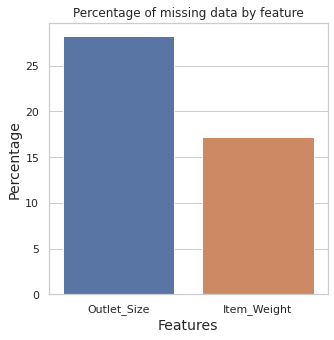

In [11]:
# Plotting the percentage of missing values
total = train_data.isnull().sum().sort_values(ascending = False)
percent_total = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]

plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

summary:
1. Item_Visibility has a min value of zero,which isn't possible because when a product is being sold at a store, the visibility cannot be 0.
2. Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
3. There are some missing values which have to be treated.
4. Cleaning Item_Fat_Content column with two groups as low and regular.
5. Categorizating  Item_Visibility with 'Low Viz', 'Viz' and 'High Viz'.

#Exploratory data analysis 

In [12]:
num_features = train_data.select_dtypes(include=[np.number])
num_features.dtypes
#out of 12 there are only 5 numeric variables.

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

1. Univariate Analysis

a) Numerical features:

In [13]:
corr=num_features.corr()
corr
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

b) Categorical features:

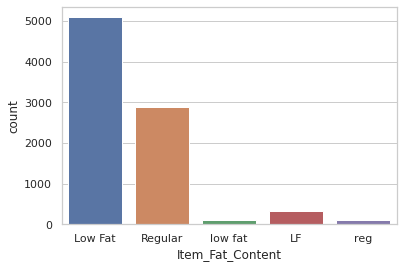

In [14]:
sns.countplot(x ='Item_Fat_Content', data = train_data)
plt.show()

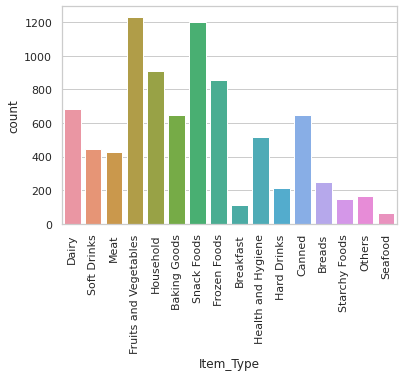

In [15]:
sns.countplot(x ='Item_Type', data = train_data)
plt.xticks(rotation=90)
plt.show()

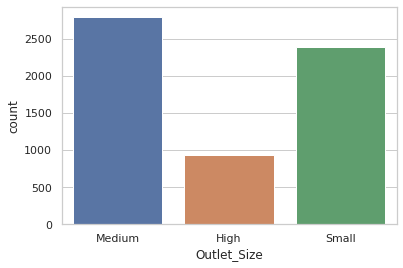

In [16]:
sns.countplot(x ='Outlet_Size', data = train_data)
plt.show()

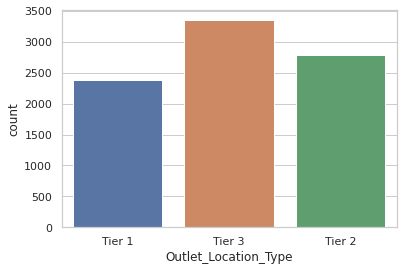

In [17]:
sns.countplot(x ='Outlet_Location_Type', data = train_data)
plt.show()

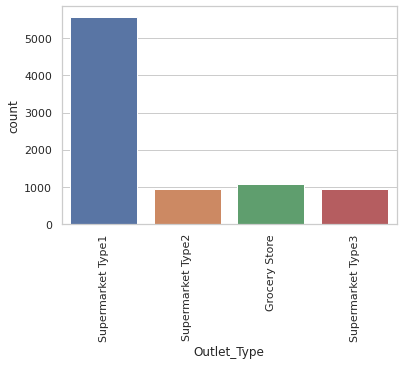

In [18]:
sns.countplot(x ='Outlet_Type', data = train_data)
plt.xticks(rotation=90)
plt.show()

2. Bivariate Analysis

a) Numerical features:

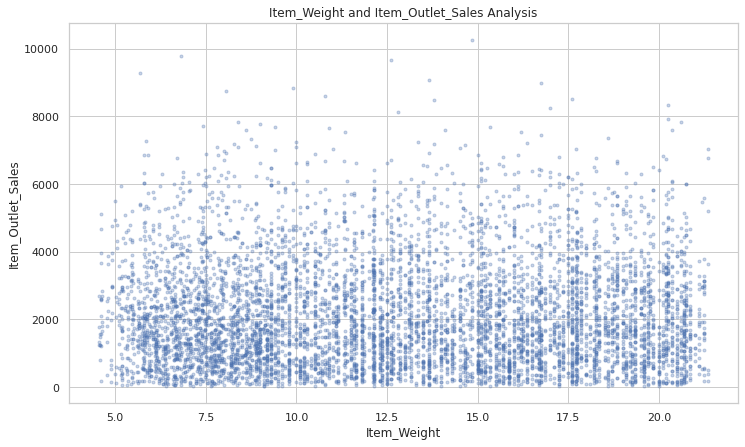

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train_data.Item_Weight, train_data["Item_Outlet_Sales"],'.', alpha = 0.3)
plt.show()

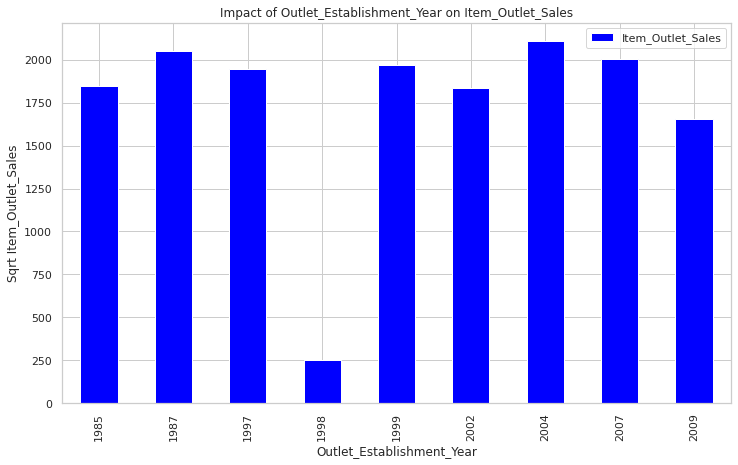

In [20]:
Outlet_Establishment_Year_pivot = train_data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.show()

b) Categorical features:

In [21]:
train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


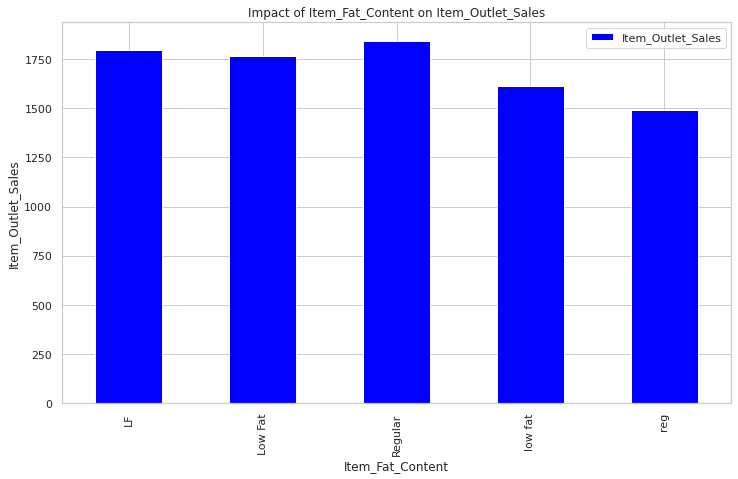

In [22]:
Item_Fat_Content_pivot = train_data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.show()

In [23]:
train_data.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


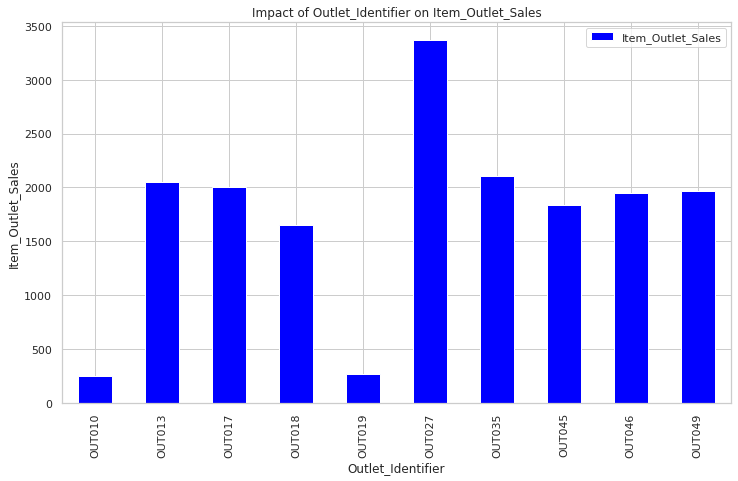

In [24]:
Outlet_Identifier_pivot = train_data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.show()

In [25]:
train_data.pivot_table(values='Outlet_Type',columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


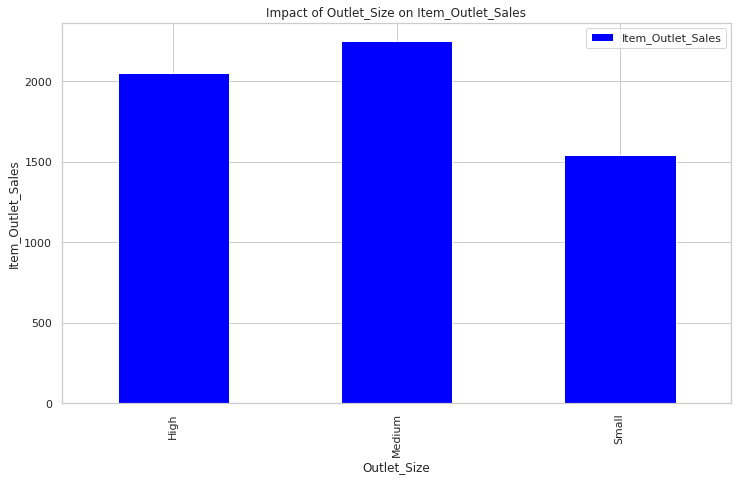

In [26]:
Outlet_Size_pivot = train_data.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.show()

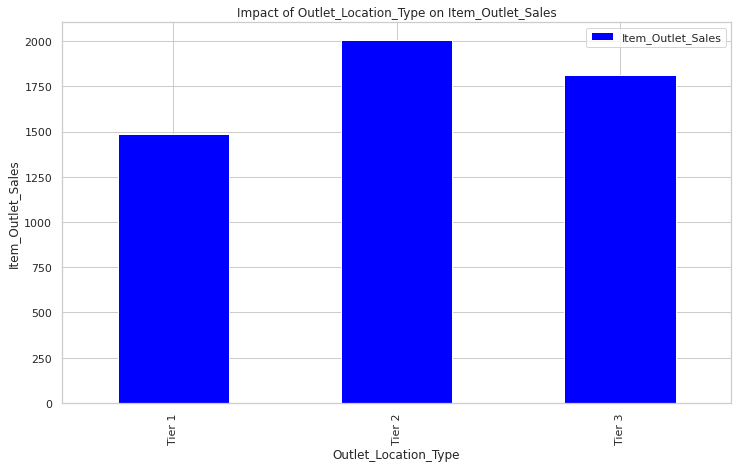

In [27]:
Outlet_Location_Type_pivot = train_data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.show()

#Data Pre-processing

In [28]:
# Filling the null values with the mean value
train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [29]:
print(train_data['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [30]:
print(train_data['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


In [31]:
var = train_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x:x.mode()))
var

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [32]:
#Filling the null values with the 'medium' value from the above table
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna('Medium')

In [33]:
train_data.isnull().sum().sort_values(ascending = False)

Item_Outlet_Sales            0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

In [34]:
print(train_data['Outlet_Establishment_Year'].unique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


In [35]:
#The data is from 2013 
train_data['Outlet_Age'] = 2013 - train_data['Outlet_Establishment_Year']
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [36]:
print(train_data['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [37]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace('reg', 'Regular')

In [38]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [39]:
train_data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

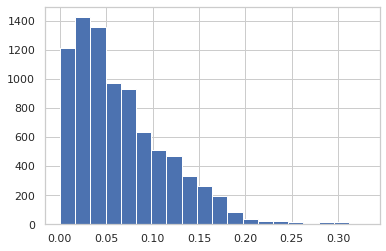

In [40]:
train_data['Item_Visibility'].hist(bins=20)
plt.show()

In [41]:
# The minimum value of the item visibility feature is zero(0)
# Replace the minimum value with the 2nd minimum value of the feature, as item visibility cannot be zero
train_data['Item_Visibility'] = train_data['Item_Visibility'].replace(0.000000,0.003574698)

In [42]:
train_data['Item_Visibility_bins'] = pd.cut(train_data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [43]:
train_data['Item_Visibility_bins'].value_counts()

Low Viz     4929
Viz         2557
High Viz     903
Name: Item_Visibility_bins, dtype: int64

In [44]:
train_data['Item_Visibility_bins'] = train_data['Item_Visibility_bins'].fillna('Low Viz')

In [45]:
train_data['Item_Visibility_bins'].value_counts()

Low Viz     5063
Viz         2557
High Viz     903
Name: Item_Visibility_bins, dtype: int64

In [46]:
train_data.isnull().sum().sort_values(ascending = False)

Item_Visibility_bins         0
Outlet_Age                   0
Item_Outlet_Sales            0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

In [47]:
train_data['Item_Identifier'].value_counts(50)

FDG33    0.001173
FDW13    0.001173
FDQ40    0.001056
NCY18    0.001056
DRE49    0.001056
           ...   
DRF48    0.000117
FDC23    0.000117
FDQ60    0.000117
FDO33    0.000117
FDY43    0.000117
Name: Item_Identifier, Length: 1559, dtype: float64

These are the three catagories how the items are identified ['FD':'Food','NC':'Non-Consumable','DR':'Drinks']

In [48]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [49]:
#grouping Item Id
train_data['Item_Id']=train_data['Item_Identifier'].str[:2]
train_data.groupby(['Item_Id','Item_Type'])['Item_Outlet_Sales'].count()

Item_Id  Item_Type            
DR       Dairy                     140
         Hard Drinks               214
         Soft Drinks               445
FD       Baking Goods              648
         Breads                    251
         Breakfast                 110
         Canned                    649
         Dairy                     542
         Frozen Foods              856
         Fruits and Vegetables    1232
         Meat                      425
         Seafood                    64
         Snack Foods              1200
         Starchy Foods             148
NC       Health and Hygiene        520
         Household                 910
         Others                    169
Name: Item_Outlet_Sales, dtype: int64

In [50]:
#Get the first two characters of ID:
train_data['Item_Type_Combined'] = train_data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
train_data['Item_Type_Combined'] = train_data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train_data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [51]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Visibility_bins','Item_Type_Combined']
le = LabelEncoder()
for i in var_mod:
     train_data[i] = le.fit_transform(train_data[i])
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Age                     int64
Item_Visibility_bins           int64
Item_Id                       object
Item_Type_Combined             int64
dtype: object

In [52]:
#create dummies for outlet type
dummy = pd.get_dummies(train_data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [53]:
train_data = pd.concat([train_data, dummy], axis=1)

In [54]:
# got to drop all the object types features
train_data = train_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year','Item_Id'], axis=1)

In [55]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Visibility_bins', 'Item_Type_Combined',
       'Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object')

#Data Pre-processing - test set

In [56]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_bins,Item_Type_Combined,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,14,1,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,4,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,14,1,1,0,1,0,0
3,19.20,1,0.003575,182.0950,1,2,732.3800,15,1,1,1,0,0,0
4,8.93,0,0.003575,53.8614,0,2,994.7052,26,1,2,0,1,0,0


In [57]:
test_data.isnull().sum()/len(test_data)*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [58]:
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [59]:
print(test_data['Outlet_Size'].unique())

['Medium' nan 'Small' 'High']


In [60]:
print(test_data['Outlet_Size'].value_counts())

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [61]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna('Medium')

In [62]:
print(test_data['Outlet_Establishment_Year'].unique())

[1999 2007 1998 1985 1997 2009 2002 1987 2004]


In [63]:
test_data['Outlet_Age'] = 2021 - test_data['Outlet_Establishment_Year']
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,23
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,14
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,36


In [64]:
test_data.isnull().sum().sort_values(ascending = False)

Outlet_Age                   0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

In [65]:
print(test_data['Item_Fat_Content'].unique())

['Low Fat' 'reg' 'Regular' 'LF' 'low fat']


In [66]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')

In [67]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace('reg', 'Regular')

In [68]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

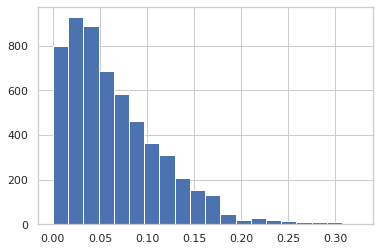

In [69]:
test_data['Item_Visibility'].hist(bins=20)
plt.show()

In [70]:
test_data['Item_Visibility'] = test_data['Item_Visibility'].replace(0.000000,0.003574698)

In [71]:
test_data['Item_Visibility_bins'] = pd.cut(test_data['Item_Visibility'], [0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [72]:
test_data['Item_Visibility_bins'].isnull().sum()

106

In [73]:
test_data['Item_Visibility_bins'] = test_data['Item_Visibility_bins'].fillna('Low Viz')

In [74]:
test_data.isnull().sum().sort_values(ascending = False)

Item_Visibility_bins         0
Outlet_Age                   0
Outlet_Type                  0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Item_MRP                     0
Item_Type                    0
Item_Visibility              0
Item_Fat_Content             0
Item_Weight                  0
Item_Identifier              0
dtype: int64

In [75]:
test_data['Item_Type_Combined'] = test_data['Item_Identifier'].apply(lambda x: x[0:2])

test_data['Item_Type_Combined'] = test_data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test_data['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [76]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Item_Visibility_bins','Item_Type_Combined']
le = LabelEncoder()
for i in var_mod:
     test_data[i] = le.fit_transform(test_data[i])
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                   object
Outlet_Age                     int64
Item_Visibility_bins           int64
Item_Type_Combined             int64
dtype: object

In [77]:
dummy_var = pd.get_dummies(test_data['Outlet_Type'])
dummy_var.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [78]:
test_data = pd.concat([test_data, dummy_var], axis=1)

In [79]:
test_data = test_data.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type','Outlet_Establishment_Year'], axis=1)

In [80]:
test_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Age',
       'Item_Visibility_bins', 'Item_Type_Combined', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [81]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Item_Visibility_bins,Item_Type_Combined,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,20.750000,0,0.007565,107.8622,1,0,22,1,1,0,1,0,0
1,8.300000,1,0.038428,87.3198,1,1,14,1,1,0,1,0,0
2,14.600000,0,0.099575,241.7538,1,2,23,2,2,1,0,0,0
3,7.315000,0,0.015388,155.0340,1,1,14,1,1,0,1,0,0
4,12.695633,1,0.118599,234.2300,1,2,36,2,1,0,0,0,1


In [82]:
test_data.isnull().sum().sort_values(ascending = False)

Supermarket Type3       0
Supermarket Type2       0
Supermarket Type1       0
Grocery Store           0
Item_Type_Combined      0
Item_Visibility_bins    0
Outlet_Age              0
Outlet_Location_Type    0
Outlet_Size             0
Item_MRP                0
Item_Visibility         0
Item_Fat_Content        0
Item_Weight             0
dtype: int64

In [83]:
X = train_data.drop('Item_Outlet_Sales', axis=1)
y = train_data.Item_Outlet_Sales

#Machine learning

In [84]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [85]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg_lin=LinearRegression(normalize=True)
reg_lin.fit(X_train,y_train)
reg_lin.score(X_train,y_train)

reg_lin_predict = reg_lin.predict(X_val)

rmse_lin=np.sqrt(mean_squared_error(reg_lin_predict,y_val))
print('RMSE for Linear Regression:{0:.2f}'.format(rmse_lin))


accuracy_lin = reg_lin.score(X_val,y_val)
print('Accuracy of the Linear Regression model:',accuracy_lin*100,'%' )


RMSE for Linear Regression:1142.36
Accuracy of the Linear Regression model: 56.4174785282036 %


In [87]:
from sklearn.linear_model import RidgeCV
reg_rid=RidgeCV(cv=10)
reg_rid.fit(X_train,y_train)
reg_rid.score(X_train,y_train)

reg_rid_predict = reg_rid.predict(X_val)

rmse_rid=np.sqrt(mean_squared_error(reg_rid_predict,y_val))
print('RMSE for Ridge Regression:{0:.2f}'.format(rmse_rid))

accuracy_rid = reg_rid.score(X_val,y_val)
print('Accuracy of the Ridge Regression model:',accuracy_rid*100,'%' )

RMSE for Ridge Regression:1142.45
Accuracy of the Ridge Regression model: 56.41084095994691 %


In [88]:
from sklearn.linear_model import Lasso
reg_lo=Lasso(alpha=0.01)
reg_lo.fit(X_train,y_train)
reg_lo.score(X_train,y_train)

reg_lo_predict = reg_lo.predict(X_val)

rmse_lo=np.sqrt(mean_squared_error(reg_lo_predict,y_val))
print('RMSE for Lasso Regression:{0:.2f}'.format(rmse_lo))

accuracy_lo = reg_lo.score(X_val,y_val)
print('Accuracy of the Lasso Regression model:',accuracy_lo*100,'%' )

RMSE for Lasso Regression:1142.26
Accuracy of the Lasso Regression model: 56.4248273512024 %


In [89]:
from sklearn.ensemble import RandomForestRegressor
reg_rfr=RandomForestRegressor(random_state=0)
reg_rfr.fit(X_train,y_train)
reg_rfr.score(X_train,y_train)
reg_rfr_predict = reg_rfr.predict(X_val)

rmse_rfr=np.sqrt(mean_squared_error(reg_rfr_predict,y_val))
print('RMSE for Random Forest Regression:{0:.2f}'.format(rmse_rfr))

accuracy_rfr = reg_rfr.score(X_val,y_val)
print('Accuracy of the Random Forest Regression model:',accuracy_rfr*100,'%' )

RMSE for Random Forest Regression:1139.54
Accuracy of the Random Forest Regression model: 56.63241151617062 %


In [90]:
from sklearn.tree import DecisionTreeRegressor
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(X_train,y_train)
reg_dt.score(X_train,y_train)
reg_dt_predict = reg_dt.predict(X_val)

rmse_dt = np.sqrt(mean_squared_error(reg_dt_predict,y_val))
print('RMSE for Decision Tree Regression:{0:.2f}'.format(rmse_dt))

accuracy_dt = reg_dt.score(X_val,y_val)
print('Accuracy of the Decision Tree Regression model:',accuracy_dt*100,'%' )

RMSE for Decision Tree Regression:1547.27
Accuracy of the Decision Tree Regression model: 20.046464389011497 %
